# 1.Importando libs

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from scipy import stats
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.feature_selection import f_regression, mutual_info_regression
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# 2.Importando dados

In [2]:
dados_brutos = pd.read_csv("20230324_Casos_e_obitos_ESP.csv", sep=";")
dados_brutos


,Asma,Cardiopatia,Data_Inicio_Sintomas,Diabetes,Diagnostico_Covid19,Doenca_Hematologica,Doenca_Hepatica,Doenca_Neurologica,Doenca Renal,Genero,Idade,Imunodepressao,Municipio,Obesidade,Obito,Outros_Fatores_De_Risco,Pneumopatia,Puérpera,Síndrome_De_Down
0,IGNORADO,IGNORADO,15/07/2022,IGNORADO,CONFIRMADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,MASCULINO,69.0,IGNORADO,ASSIS,IGNORADO,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO
1,IGNORADO,IGNORADO,21/02/2021,IGNORADO,CONFIRMADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,FEMININO,60.0,IGNORADO,SÃO PAULO,IGNORADO,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO
2,IGNORADO,IGNORADO,23/06/2021,IGNORADO,CONFIRMADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,MASCULINO,58.0,IGNORADO,ARARAQUARA,IGNORADO,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO
3,IGNORADO,IGNORADO,03/02/2021,IGNORADO,CONFIRMADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,FEMININO,45.0,IGNORADO,SÃO PAULO,IGNORADO,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO
4,IGNORADO,IGNORADO,23/02/2021,IGNORADO,CONFIRMADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,FEMININO,42.0,IGNORADO,SÃO PAULO,IGNORADO,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6521545,IGNORADO,IGNORADO,11/01/2022,IGNORADO,CONFIRMADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,MASCULINO,1.0,IGNORADO,SÃO BERNARDO DO CAMPO,IGNORADO,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO
6521546,IGNORADO,IGNORADO,18/05/2021,IGNORADO,CONFIRMADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,MASCULINO,9.0,IGNORADO,ITAQUAQUECETUBA,IGNORADO,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO
6521547,IGNORADO,IGNORADO,02/01/2023,IGNORADO,CONFIRMADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,MASCULINO,0.0,IGNORADO,CAMPINAS,IGNORADO,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO
6521548,NÃO,SIM,10/05/2020,SIM,CONFIRMADO,NÃO,NÃO,NÃO,NÃO,FEMININO,77.0,NÃO,SÃO PAULO,NÃO,1,IGNORADO,NÃO,NÃO,NÃO


# 3.Preparando os dados

### 3.1.Retirando colunas que não serão utilizadas

Como os resultados buscados não dizem respeito ao município, removeremos esta coluna.

In [3]:
dados_sem_municipio = dados_brutos.drop(["Municipio"], axis=1)
dados_sem_municipio

,Asma,Cardiopatia,Data_Inicio_Sintomas,Diabetes,Diagnostico_Covid19,Doenca_Hematologica,Doenca_Hepatica,Doenca_Neurologica,Doenca Renal,Genero,Idade,Imunodepressao,Obesidade,Obito,Outros_Fatores_De_Risco,Pneumopatia,Puérpera,Síndrome_De_Down
0,IGNORADO,IGNORADO,15/07/2022,IGNORADO,CONFIRMADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,MASCULINO,69.0,IGNORADO,IGNORADO,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO
1,IGNORADO,IGNORADO,21/02/2021,IGNORADO,CONFIRMADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,FEMININO,60.0,IGNORADO,IGNORADO,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO
2,IGNORADO,IGNORADO,23/06/2021,IGNORADO,CONFIRMADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,MASCULINO,58.0,IGNORADO,IGNORADO,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO
3,IGNORADO,IGNORADO,03/02/2021,IGNORADO,CONFIRMADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,FEMININO,45.0,IGNORADO,IGNORADO,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO
4,IGNORADO,IGNORADO,23/02/2021,IGNORADO,CONFIRMADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,FEMININO,42.0,IGNORADO,IGNORADO,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6521545,IGNORADO,IGNORADO,11/01/2022,IGNORADO,CONFIRMADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,MASCULINO,1.0,IGNORADO,IGNORADO,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO
6521546,IGNORADO,IGNORADO,18/05/2021,IGNORADO,CONFIRMADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,MASCULINO,9.0,IGNORADO,IGNORADO,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO
6521547,IGNORADO,IGNORADO,02/01/2023,IGNORADO,CONFIRMADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,MASCULINO,0.0,IGNORADO,IGNORADO,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO
6521548,NÃO,SIM,10/05/2020,SIM,CONFIRMADO,NÃO,NÃO,NÃO,NÃO,FEMININO,77.0,NÃO,NÃO,1,IGNORADO,NÃO,NÃO,NÃO


Também, como consideraremos apenas "doenças pré-existentes" retiraremos as colunas que não são relativas a doenças, sendo elas: "Outros_Fatores_De_Risco" e "Puérpera". Consultando especialista médica, apesar da descrição como doença no dicionário de dados, "Síndrome_De_Down" será mantida mas será avaliada com ressalvas ao final. Manteremos "Imunodepressao" por normalmente está atrelada a doenças, principalmente AIDS. Por fim, visto que "Diagnostico_Covid19" só tem o valor "Confirmado" a mesma será excluída por não trazer nenhuma informação nova

In [4]:
dados_sem_colunas = dados_sem_municipio.drop(["Outros_Fatores_De_Risco"], axis=1)
dados_sem_colunas = dados_sem_colunas.drop(["Puérpera"], axis=1)
dados_sem_colunas = dados_sem_colunas.drop(["Diagnostico_Covid19"], axis=1)
dados_sem_colunas

,Asma,Cardiopatia,Data_Inicio_Sintomas,Diabetes,Doenca_Hematologica,Doenca_Hepatica,Doenca_Neurologica,Doenca Renal,Genero,Idade,Imunodepressao,Obesidade,Obito,Pneumopatia,Síndrome_De_Down
0,IGNORADO,IGNORADO,15/07/2022,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,MASCULINO,69.0,IGNORADO,IGNORADO,0,IGNORADO,IGNORADO
1,IGNORADO,IGNORADO,21/02/2021,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,FEMININO,60.0,IGNORADO,IGNORADO,0,IGNORADO,IGNORADO
2,IGNORADO,IGNORADO,23/06/2021,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,MASCULINO,58.0,IGNORADO,IGNORADO,0,IGNORADO,IGNORADO
3,IGNORADO,IGNORADO,03/02/2021,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,FEMININO,45.0,IGNORADO,IGNORADO,0,IGNORADO,IGNORADO
4,IGNORADO,IGNORADO,23/02/2021,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,FEMININO,42.0,IGNORADO,IGNORADO,0,IGNORADO,IGNORADO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6521545,IGNORADO,IGNORADO,11/01/2022,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,MASCULINO,1.0,IGNORADO,IGNORADO,0,IGNORADO,IGNORADO
6521546,IGNORADO,IGNORADO,18/05/2021,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,MASCULINO,9.0,IGNORADO,IGNORADO,0,IGNORADO,IGNORADO
6521547,IGNORADO,IGNORADO,02/01/2023,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,MASCULINO,0.0,IGNORADO,IGNORADO,0,IGNORADO,IGNORADO
6521548,NÃO,SIM,10/05/2020,SIM,NÃO,NÃO,NÃO,NÃO,FEMININO,77.0,NÃO,NÃO,1,NÃO,NÃO


Agora vamos reorganizar as colunas para facilitar visualização e operações futuras

In [5]:
nova_ordem = ['Genero', 'Idade', 'Data_Inicio_Sintomas', 'Obito', 'Asma', 'Cardiopatia', 'Diabetes', 'Doenca_Hematologica','Doenca_Hepatica', 'Doenca_Neurologica', 'Doenca Renal', 'Imunodepressao', 'Obesidade', 'Pneumopatia', 'Síndrome_De_Down']

dados_colunas_finais = dados_sem_colunas.reindex(columns= nova_ordem)

dados_colunas_finais

,Genero,Idade,Data_Inicio_Sintomas,Obito,Asma,Cardiopatia,Diabetes,Doenca_Hematologica,Doenca_Hepatica,Doenca_Neurologica,Doenca Renal,Imunodepressao,Obesidade,Pneumopatia,Síndrome_De_Down
0,MASCULINO,69.0,15/07/2022,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO
1,FEMININO,60.0,21/02/2021,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO
2,MASCULINO,58.0,23/06/2021,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO
3,FEMININO,45.0,03/02/2021,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO
4,FEMININO,42.0,23/02/2021,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6521545,MASCULINO,1.0,11/01/2022,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO
6521546,MASCULINO,9.0,18/05/2021,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO
6521547,MASCULINO,0.0,02/01/2023,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO
6521548,FEMININO,77.0,10/05/2020,1,NÃO,SIM,SIM,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO


### 3.2.Identificando os dados de cada coluna

In [6]:
dados_colunas_finais.dtypes

Genero                   object
Idade                   float64
Data_Inicio_Sintomas     object
Obito                     int64
Asma                     object
Cardiopatia              object
Diabetes                 object
Doenca_Hematologica      object
Doenca_Hepatica          object
Doenca_Neurologica       object
Doenca Renal             object
Imunodepressao           object
Obesidade                object
Pneumopatia              object
Síndrome_De_Down         object
dtype: object

Já é possível visualizar que Data_Inicio_Sintomas precisará de uma alteração de formato para a realização de operações

## 3.2.1.Visualizando colunas individuais

Aproveitando para buscar também dados faltantes para tratamento posterior

In [7]:
for coluna in dados_colunas_finais.columns:
    print(coluna)
    print(dados_colunas_finais[coluna].value_counts())
    print("\n")

Genero
FEMININO      3562127
MASCULINO     2955942
INDEFINIDO       3471
IGNORADO            9
Name: Genero, dtype: int64


Idade
39.0      145261
38.0      145132
40.0      139092
37.0      138631
34.0      137172
           ...  
119.0          3
115.0          3
136.0          1
2188.0         1
125.0          1
Name: Idade, Length: 126, dtype: int64


Data_Inicio_Sintomas
10/01/2022    40941
17/01/2022    34239
15/01/2022    32309
14/01/2022    31820
09/01/2022    30486
              ...  
13/02/2020       23
09/02/2020       22
16/02/2020       19
07/02/2020       15
23/03/2023        3
Name: Data_Inicio_Sintomas, Length: 1144, dtype: int64


Obito
0    6342162
1     179388
Name: Obito, dtype: int64


Asma
IGNORADO    6290878
NÃO          214759
SIM           15913
Name: Asma, dtype: int64


Cardiopatia
IGNORADO    5960201
SIM          461557
NÃO           99792
Name: Cardiopatia, dtype: int64


Diabetes
IGNORADO    6074317
SIM          307108
NÃO          140125
Name: Diabetes, d

Podemos perceber que os valores de gênero não se limitam aos dois referidos no dicionário de dados e que existem outliers nas idades. Ambos precisam ser tratados.

# 3.2.1.1. Entendendo melhor a coluna 'Idade'

In [8]:
dados_colunas_finais['Idade'].describe()

count    6.320597e+06
mean     4.099369e+01
std      1.839248e+01
min      0.000000e+00
25%      2.800000e+01
50%      4.000000e+01
75%      5.300000e+01
max      2.188000e+03
Name: Idade, dtype: float64

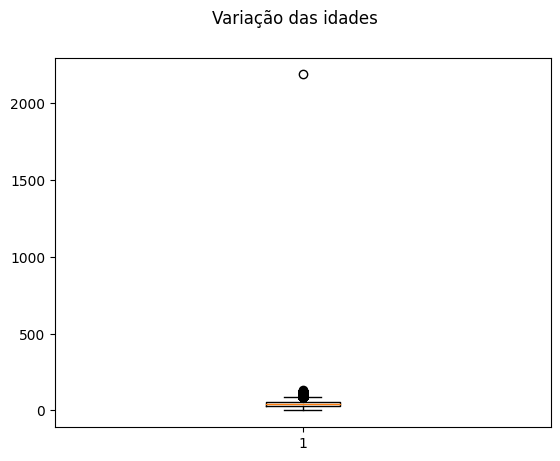

In [9]:
idade_inicial = dados_colunas_finais['Idade'].copy()

fig, ax = plt.subplots()
fig.suptitle("Variação das idades")
ax.boxplot(idade_inicial.dropna().values)

plt.show()

Tirando os outliers

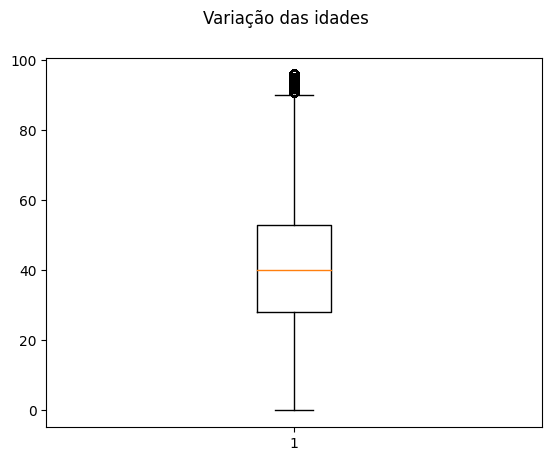

In [10]:
media = dados_colunas_finais['Idade'].mean()
dp = dados_colunas_finais['Idade'].std()

limite_max = media + 3*dp
limite_min = media - 3*dp

idade_sem_outliers = dados_colunas_finais[(dados_colunas_finais['Idade'] <= limite_max) & (dados_colunas_finais['Idade'] >= limite_min)]['Idade'].copy()

fig, ax = plt.subplots()
fig.suptitle("Variação das idades")
ax.boxplot(idade_sem_outliers.dropna().values)

plt.show()

Vendo a nova base de idades

In [11]:
idade_sem_outliers.describe()

count    6.315782e+06
mean     4.094630e+01
std      1.829908e+01
min      0.000000e+00
25%      2.800000e+01
50%      4.000000e+01
75%      5.300000e+01
max      9.600000e+01
Name: Idade, dtype: float64

Como os dados retirados eram outliers, foi feito de uma forma sistemática, não arbitrária e na impossibilidade de verificar quais eram erros e quais eram de fato fora do comum, vamos seguir as análises com a nova base

In [12]:
dados_sem_outliers_idade = dados_colunas_finais[(dados_colunas_finais['Idade'] <= limite_max) & (dados_colunas_finais['Idade'] >= limite_min)].copy()

dados_sem_outliers_idade.sort_values(by=['Idade'], ascending=False)

,Genero,Idade,Data_Inicio_Sintomas,Obito,Asma,Cardiopatia,Diabetes,Doenca_Hematologica,Doenca_Hepatica,Doenca_Neurologica,Doenca Renal,Imunodepressao,Obesidade,Pneumopatia,Síndrome_De_Down
705442,FEMININO,96.0,21/11/2020,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO
4805776,FEMININO,96.0,16/01/2022,0,IGNORADO,SIM,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO
611085,MASCULINO,96.0,21/11/2020,1,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,SIM,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO
2940279,MASCULINO,96.0,24/01/2022,0,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO
1398187,FEMININO,96.0,10/04/2021,1,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516660,MASCULINO,0.0,21/01/2022,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO
5162713,MASCULINO,0.0,26/01/2022,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO
5162720,MASCULINO,0.0,10/07/2022,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO
738794,MASCULINO,0.0,26/02/2023,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO


## 3.3.Alterando os dados para maior facilidade de limpeza

### 3.3.1. Gênero (0 para MASCULINO, 1 para FEMININO, resto é NaN)

In [13]:
dados_modificacao_genero = dados_sem_outliers_idade.copy()

dados_modificacao_genero.loc[dados_modificacao_genero['Genero'] == 'MASCULINO', 'Genero'] = 0
dados_modificacao_genero.loc[dados_modificacao_genero['Genero'] == 'FEMININO', 'Genero'] = 1
dados_modificacao_genero.loc[dados_modificacao_genero['Genero'] == 'INDEFINIDO', 'Genero'] = np.nan
dados_modificacao_genero.loc[dados_modificacao_genero['Genero'] == 'IGNORADO', 'Genero'] = np.nan


dados_modificacao_genero

,Genero,Idade,Data_Inicio_Sintomas,Obito,Asma,Cardiopatia,Diabetes,Doenca_Hematologica,Doenca_Hepatica,Doenca_Neurologica,Doenca Renal,Imunodepressao,Obesidade,Pneumopatia,Síndrome_De_Down
0,0,69.0,15/07/2022,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO
1,1,60.0,21/02/2021,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO
2,0,58.0,23/06/2021,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO
3,1,45.0,03/02/2021,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO
4,1,42.0,23/02/2021,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6521545,0,1.0,11/01/2022,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO
6521546,0,9.0,18/05/2021,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO
6521547,0,0.0,02/01/2023,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO
6521548,1,77.0,10/05/2020,1,NÃO,SIM,SIM,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO


### 3.3.2. Datas para um formato operável

In [14]:
dados_modificacao_data = dados_modificacao_genero.copy()

dados_modificacao_data['Data_Inicio_Sintomas'] = pd.to_datetime(dados_modificacao_data['Data_Inicio_Sintomas'], format='%d/%m/%Y')

dados_modificacao_data

,Genero,Idade,Data_Inicio_Sintomas,Obito,Asma,Cardiopatia,Diabetes,Doenca_Hematologica,Doenca_Hepatica,Doenca_Neurologica,Doenca Renal,Imunodepressao,Obesidade,Pneumopatia,Síndrome_De_Down
0,0,69.0,2022-07-15,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO
1,1,60.0,2021-02-21,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO
2,0,58.0,2021-06-23,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO
3,1,45.0,2021-02-03,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO
4,1,42.0,2021-02-23,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6521545,0,1.0,2022-01-11,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO
6521546,0,9.0,2021-05-18,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO
6521547,0,0.0,2023-01-02,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO
6521548,1,77.0,2020-05-10,1,NÃO,SIM,SIM,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO


### 3.3.3. Demais (1 para SIM, 2 para NÃO, NaN para IGNORADO)

In [15]:
df = dados_modificacao_data.copy()

for coluna in dados_modificacao_data.columns[4:]:
    df.loc[df[coluna] == 'NÃO', coluna] = 0
    df.loc[df[coluna] == 'SIM', coluna] = 1
    df.loc[df[coluna] == 'IGNORADO', coluna] = np.nan

df

,Genero,Idade,Data_Inicio_Sintomas,Obito,Asma,Cardiopatia,Diabetes,Doenca_Hematologica,Doenca_Hepatica,Doenca_Neurologica,Doenca Renal,Imunodepressao,Obesidade,Pneumopatia,Síndrome_De_Down
0,0,69.0,2022-07-15,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,60.0,2021-02-21,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,58.0,2021-06-23,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,45.0,2021-02-03,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,42.0,2021-02-23,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6521545,0,1.0,2022-01-11,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6521546,0,9.0,2021-05-18,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6521547,0,0.0,2023-01-02,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6521548,1,77.0,2020-05-10,1,0,1,1,0,0,0,0,0,0,0,0


## 3.4.Limpando os dados

Como as instâncias não tem relações entre si, vamos tirar os NaNs para obter a versão limpa, ambas serão usadas conforme a pertinência da análise

In [16]:
df_sem_na = df.copy()

df_sem_na = df_sem_na.dropna()

df_sem_na

,Genero,Idade,Data_Inicio_Sintomas,Obito,Asma,Cardiopatia,Diabetes,Doenca_Hematologica,Doenca_Hepatica,Doenca_Neurologica,Doenca Renal,Imunodepressao,Obesidade,Pneumopatia,Síndrome_De_Down
4034,0,82.0,2020-08-24,1,0,0,1,0,0,0,0,0,0,0,0
4035,1,30.0,2021-06-01,1,0,0,1,0,0,0,0,0,1,0,0
4036,0,32.0,2020-08-27,1,0,1,0,0,0,0,0,0,0,0,0
4037,0,69.0,2020-08-21,0,0,0,0,0,0,0,0,0,0,0,0
4038,0,78.0,2020-08-09,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6521490,1,80.0,2020-11-18,1,0,1,0,0,0,0,0,0,1,0,0
6521501,1,48.0,2021-02-06,0,0,1,0,0,0,0,0,0,0,0,0
6521507,0,56.0,2020-11-10,0,0,0,1,0,0,0,0,0,0,0,0
6521533,0,69.0,2022-06-06,0,0,1,1,0,0,0,0,0,0,0,0


# 4. Estatística Descritiva

Como idade é a única variável quantitativa (e discreta)

In [17]:
df['Idade'].describe()

count    6.315782e+06
mean     4.094630e+01
std      1.829908e+01
min      0.000000e+00
25%      2.800000e+01
50%      4.000000e+01
75%      5.300000e+01
max      9.600000e+01
Name: Idade, dtype: float64

Para as categóricas (nominais)

In [18]:
for coluna in df.drop(['Idade', 'Data_Inicio_Sintomas'], axis = 1).columns:
    print(coluna)
    conta = df[coluna].value_counts()
    print(conta)

    proporcao = conta / len(df)
    
    porcentagem = proporcao * 100
    print(porcentagem)
    print("\n")

Genero
1    3451926
0    2860964
Name: Genero, dtype: int64
1    54.65556
0    45.29865
Name: Genero, dtype: float64


Obito
0    6137915
1     177867
Name: Obito, dtype: int64
0    97.183769
1     2.816231
Name: Obito, dtype: float64


Asma
0    213783
1     15881
Name: Asma, dtype: int64
0    3.384902
1    0.251449
Name: Asma, dtype: float64


Cardiopatia
1    457662
0     99426
Name: Cardiopatia, dtype: int64
1    7.246324
0    1.574247
Name: Cardiopatia, dtype: float64


Diabetes
1    304533
0    139334
Name: Diabetes, dtype: int64
1    4.821778
0    2.206124
Name: Diabetes, dtype: float64


Doenca_Hematologica
0    221700
1      4410
Name: Doenca_Hematologica, dtype: int64
0    3.510254
1    0.069825
Name: Doenca_Hematologica, dtype: float64


Doenca_Hepatica
0    220727
1      4629
Name: Doenca_Hepatica, dtype: int64
0    3.494848
1    0.073293
Name: Doenca_Hepatica, dtype: float64


Doenca_Neurologica
0    209424
1     23060
Name: Doenca_Neurologica, dtype: int64
0    3.315884
1

# 5. Perguntas

## 1- Existe diferença de incidência de covid entre homens e mulheres?

In [19]:
conta = df['Genero'].value_counts()
print(conta)

proporcao = conta / len(df)

porcentagem = proporcao * 100
print(porcentagem)

1    3451926
0    2860964
Name: Genero, dtype: int64
1    54.65556
0    45.29865
Name: Genero, dtype: float64


Como feito anteriormente, sim. No universo estudado, 54.66% dos casos são em mulheres enquanto 45.30% dos casos são em homens. O percentual restante ou não foi definido ou ignorou-se o gênero.

## 2- Faça um gráfico da mortalidade por faixas de idade


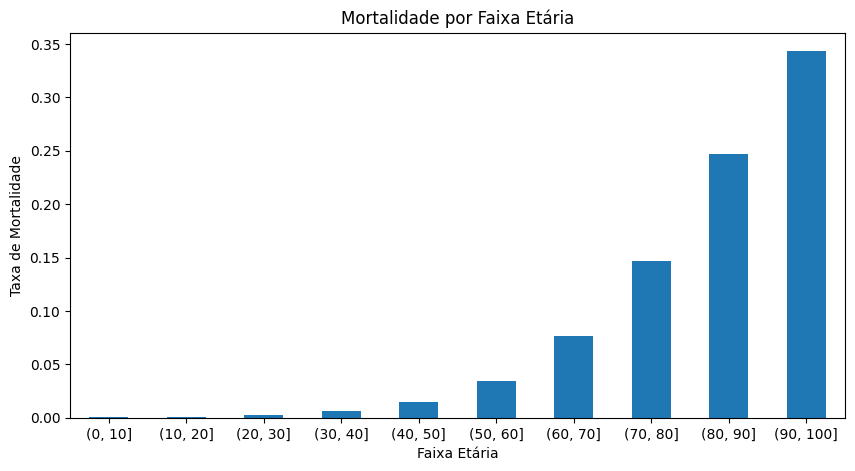

In [20]:
mortalidade_por_idade = df.groupby(pd.cut(df['Idade'], bins=np.arange(0, 101, 10))).agg({'Obito': 'mean'})

mortalidade_por_idade.plot(kind='bar', legend=None, figsize=(10, 5))
plt.xticks(rotation=0)
plt.xlabel('Faixa Etária')
plt.ylabel('Taxa de Mortalidade')
plt.title('Mortalidade por Faixa Etária')
plt.show()

## 3- Qual a doença pré-existente mais provável de se encontrar numa pessoa com covid?

In [21]:
doencas = df.iloc[:, 4:]

frequencias = doencas.apply(pd.value_counts)

soma_frequencias = frequencias.sum()

frequencias_ordenadas = soma_frequencias.sort_values(ascending=False)

print(f'Doença pré-existente mais comum em pessoas com Covid é {frequencias_ordenadas.index[0]} com {frequencias_ordenadas.iloc[0]} casos')

i = 1
print("Seguido por: ")
for doenca in range(1,3):
    print(f'{i+1} - {frequencias_ordenadas.index[i]} - {frequencias_ordenadas.iloc[i]}')
    i += 1

sem_imunodepressao = frequencias_ordenadas.drop('Imunodepressao', axis=0)

j = 0
print(" \nOu, sem imunodepressão (caso a mesma não seja considerada doença como ponderado no começo), o ranking fica: ")
for doenca in range(3):
    print(f'{j+1} - {sem_imunodepressao.index[j]} - {sem_imunodepressao.iloc[j]}')
    j += 1

Doença pré-existente mais comum em pessoas com Covid é Cardiopatia com 557088 casos
Seguido por: 
2 - Diabetes - 443867
3 - Imunodepressao - 251790
 
Ou, sem imunodepressão (caso a mesma não seja considerada doença como ponderado no começo), o ranking fica: 
1 - Cardiopatia - 557088
2 - Diabetes - 443867
3 - Doenca Renal - 242001


## 4- Baseado nesses dados, faça um modelo que estime a probabilidade da pessoa morrer, uma vez que está contaminada com covid, e considerando os inputs de idade, gênero e doenças pré-existentes

Utilizando o modelo de regressão logística, um dos mais comuns na área de saúde, especialmente em estudos epidemiológicos por sua utilidade para variáveis de resultado binário.

In [22]:
X = df_sem_na[['Genero', 'Idade', 'Asma', 'Cardiopatia', 'Diabetes', 'Doenca_Hematologica', 'Doenca_Hepatica', 'Doenca_Neurologica', 'Doenca Renal', 'Imunodepressao', 'Obesidade', 'Pneumopatia', 'Síndrome_De_Down']].copy()
y = df_sem_na['Obito'].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)

score = lr.score(X_test, y_test)
print("Acurácia do modelo: {:.2f}%".format(score*100))

Acurácia do modelo: 65.90%


c:\Users\rubem\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### 4.1. Testando modelos de regressão diferentes buscando otimizar o resultado

In [23]:
tr = DecisionTreeRegressor(random_state=42)
tr.fit(X_train, y_train)
score = tr.score(X_test, y_test)
print("Acurácia do modelo tr: {:.2f}%".format(score*100))

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
score = rf.score(X_test, y_test)
print("Acurácia do modelo rf: {:.2f}%".format(score*100))

gb = GradientBoostingRegressor(random_state=42)
gb.fit(X_train, y_train)
score = gb.score(X_test, y_test)
print("Acurácia do modelo gb: {:.2f}%".format(score*100))

Acurácia do modelo tr: 0.09%
Acurácia do modelo rf: 3.31%
Acurácia do modelo gb: 7.59%


Realmente o modelo inicial apresentou resultado muito superior.

### 4.2. Feature Selection

In [50]:
f_reg = SelectKBest(f_regression, k=5)

f_reg.fit(X_train, y_train)

f_reg_support = f_reg.get_support()
f_feature = X_train.loc[:, f_reg_support].columns.tolist()

f_feature

['Idade', 'Cardiopatia', 'Doenca_Neurologica', 'Doenca Renal', 'Pneumopatia']

In [52]:
mi_reg = SelectKBest(mutual_info_regression, k=7)

mi_reg.fit(X_train, y_train)

mi_reg_support = mi_reg.get_support()
mi_feature = X_train.loc[:, mi_reg_support].columns.tolist()

mi_feature

['Idade',
 'Asma',
 'Doenca_Hematologica',
 'Doenca_Hepatica',
 'Doenca_Neurologica',
 'Doenca Renal',
 'Pneumopatia']

Conforme a solicitação, usaremos idade e gênero, como aparecem em ambos, também usaremos, cardiopatia, doença neurológica e pneumopatia.

### 4.3. Tuning de hiperparâmetros

In [41]:
X_2 = X[['Genero', 'Idade', 'Cardiopatia', 'Doenca_Neurologica', 'Pneumopatia']].copy()

X_2_train, X_2_test, y_train, y_test = train_test_split(X_2, y, test_size=0.3, random_state=42)

lr = LogisticRegression(random_state=42)
lr.fit(X_2_train, y_train)

LogisticRegression(random_state=42)

In [44]:
lr_grid_dict = {
    'penalty' : ['l1', 'l2', 'elasticnet'],
    'C' : np.logspace(-2, 2, 10),
    'solver' : ["newton-cg", "lbfgs", "liblinear", "sag", "saga"],
    'max_iter' : [100, 500],
}

lg_grid = GridSearchCV(lr, lr_grid_dict, cv=2)
                    
lg_grid.fit(X_2_train, y_train)

print(lg_grid.best_score_)

print(lg_grid.best_params_)

c:\Users\rubem\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
320 fits failed out of a total of 600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\rubem\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\rubem\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Users\rubem\AppData\Local\Programs\Py

0.6544787790540905
{'C': 0.0774263682681127, 'max_iter': 100, 'penalty': 'l2', 'solver': 'newton-cg'}


In [45]:
lg_grid_rand = RandomizedSearchCV(lr, lr_grid_dict, cv=2)

lg_grid_rand.fit(X_2_train, y_train)

print(lg_grid_rand.best_score_)

print(lg_grid_rand.best_params_)

c:\Users\rubem\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
6 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\rubem\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\rubem\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Users\rubem\AppData\Local\Programs\Python

0.6544787790540905
{'solver': 'newton-cg', 'penalty': 'l2', 'max_iter': 500, 'C': 1.6681005372000592}


### 4.4. Modelo final

In [53]:
lr_final = LogisticRegression(random_state=42, solver='newton-cg', penalty = 'l2', max_iter = 100, C = 0.0774)
lr_final.fit(X_2_train, y_train)

score = lr_final.score(X_2_test, y_test)
print("Acurácia do modelo: {:.2f}%".format(score*100))

Acurácia do modelo: 65.49%


Que é equivalente ao modelo inicial, que pode ser usado para simplificação